In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tqdm

<h3>Monte Carlo Integration</h3>
Suppose one wishes to integrate some integrable function f over some volume where
$$\mathbf{x}  \in \mathbb{R} ^{n}, f(\mathbf{x}) \in \mathbb{R}, n\in \mathbb{N}$$
$$V = \int_{V}^{ } dV$$
The integral can be approximated as the following:
$$\int_{V}^{ } f(\mathbf{x})dV \approx \frac{V}{N}\sum_{i=1}^{N}f(\mathbf{x_{i}})$$
Where $N \in \mathbb{N}$ is the number of independent samples $\mathbf{x_{i}}$ taken from a uniform distribution inside the volume $V$. This is known as Monte Carlo Integration

As it is a constant, the expectation of $f(\mathbf{x_{i}})$ in $V$ is equal to the result of the integral divided by the volume:
$$\left \langle f \right \rangle = \frac{\int_{V}^{ } f(\mathbf{x})dV}{V}$$

Thus, the exppected error in the approximation can be written as:
$$\mathbf{Err} = E\left [\frac{V}{N}\sum_{i=1}^{N}f(\mathbf{x_{i}}) - V\left \langle f \right \rangle  \right ]$$

As $\left \langle f \right \rangle$ is a constant, one obtains:

$$\mathbf{Err} = E\left [\frac{V}{N}\sum_{i=1}^{N}\left (f(\mathbf{x_{i}}) - \left \langle f \right \rangle  \right )  \right ]$$

As $E\left [f(\mathbf{x_{i}})  \right ] = E\left [\left \langle f \right \rangle   \right ]$, the expected error is $0$. Thus, to properly investigate convergence, one requires the Mean Squared Error:

$$\mathbf{MSE} = E\left [\left (\frac{V}{N}  \right )^{2}\sum_{i=1}^{N}\left (f(\mathbf{x_{i}}) - \left \langle f \right \rangle  \right )^{2} \right ]$$

Using the linear properties of the expectation operator, this becomes:
$$\mathbf{MSE} = \left (\frac{V}{N}  \right )^{2}\sum_{i=1}^{N}E\left [\left (f(\mathbf{x_{i}}) - \left \langle f \right \rangle  \right )^{2}  \right ]  $$

Or:

$$\mathbf{MSE} = \left (\frac{V}{N}  \right )^{2}\sum_{i=1}^{N}E\left [\left (f(\mathbf{x_{i}}) - E\left [f(\mathbf{x_{i}}) \right ] + E\left [f(\mathbf{x_{i}}) \right ] - \left \langle f \right \rangle  \right )^{2}  \right ]  $$

Expanding the brackets:

$$\mathbf{MSE} = \left (\frac{V}{N}  \right )^{2}\sum_{i=1}^{N}E\left [(f(\mathbf{x_{i}}) - E\left [f(\mathbf{x_{i}}) \right ])^{2} + (E\left [f(\mathbf{x_{i}}) \right ] - \left \langle f \right \rangle  )^{2}    + 2(f(\mathbf{x_{i}}) - E\left [f(\mathbf{x_{i}}) \right ])(E\left [f(\mathbf{x_{i}}) \right ] - \left \langle f \right \rangle  ) \right ]$$

Using $E\left [f(\mathbf{x_{i}})  \right ] = E\left [\left \langle f \right \rangle   \right ]$, the MSE is simplified to:
$$\mathbf{MSE} = \left (\frac{V}{N}  \right )^{2}\sum_{i=1}^{N}E\left [(f(\mathbf{x_{i}}) - E\left [f(\mathbf{x_{i}}) \right ])^{2} \right ] = \left (\frac{V}{N}  \right )^{2}\sum_{i=1}^{N}E\left [(f(\mathbf{x_{i}}) - \left \langle f \right \rangle)^{2} \right ]$$

Or
$$\mathbf{MSE} = \left (\frac{V}{N}  \right )^{2}\sum_{i=1}^{N}Var(f)$$

Thus:
$$\mathbf{MSE} = \left (\frac{V}{N}  \right )^{2}N\cdot Var(f) = \frac{V^{2}}{N}Var(f)$$

Taking the square root of MSE, we obtain the final estimate for the error as:
$$\mathbf{RMSE} = \sqrt{Var(f)}\cdot \frac{V}{\sqrt{N}}$$

Thus, the error in Monte Carlo Integration should be proportional to $\frac{1}{\sqrt{N}}$

<h3>Convergence comparison</h3>
To obtain empirical evidence of the convergence, one can assess how the error changes with number of samples for a given integral. For a comparison, the error terms for integration using the trapzium rule and simpson's rule are also shown

<h3>Function definitions</h3>
Below is the function f(x):
$$f(x) = \frac{cos(x)^{2}}{2}$$

And 3 different methods of numerical integration: The Monte Carlo Method, The Trapezium Rule and Simpson's Rule

In [2]:
def f(x):
    """
    Returns half of the squared cosine of an input variable x
    """
    return (np.cos(x) ** 2)/2

In [3]:
def mc_integrate(f, lower_lim=0, upper_lim=1, samples = 10000):
    """
    Integrates a function using the monte carlo
    integration algorithm.
    """
    dist = np.random.uniform(low=lower_lim,
                             high=upper_lim,
                             size=samples + 1)
    coefficient = (upper_lim - lower_lim) / samples
    summation = np.sum(f(dist))

    return coefficient * summation

In [4]:
def simpson_integrate(f, lower_lim=0, upper_lim=1, samples = 10000):
    """
    Integrates a function using simpson's rule
    """
    assert samples % 2 == 0
    x = np.linspace(lower_lim, upper_lim, samples + 1)
    y = f(x)
    width = (upper_lim - lower_lim) / samples
            
    return np.sum(y[0:-1:2] + y[2::2] + y[1::2] * 4) * (width / 3)


In [5]:
def trapezium_integrate(f, lower_lim=0, upper_lim=1, samples = 10000):
    """
    Integrates a function using the trapezium rule
    """
    dist = np.linspace(lower_lim, upper_lim, samples + 1)
    width = (upper_lim - lower_lim) / samples
    start_end_terms = (f(dist[-1]) + f(dist[0])) / 2
    
    middle_terms = sum(f(dist[1:-1]))
    
    return (middle_terms + start_end_terms) * width

As
$$cos(x)^{2} + sin(x)^{2} = 1$$
And 
$$cos(2x) = cos(x)^{2} - sin(x)^{2}$$
One finds that
$$cos(2x) = 2cos(x)^{2} - 1$$
Or
$$\frac{cos(2x) + 1}{2} =cos(x)^{2}$$
Thus
$$\int \frac{cos(x)^{2}}{2}dx = \int \frac{cos(2x) + 1}{4}dx$$
Therefore, we obtain the analytic value of the integral as:
$$\int_{0}^{2}\frac{cos(x)^{2}}{2}dx = \frac{1}{4}\int_{0}^{2}cos(2x)dx + \frac{1}{4}\int_{0}^{2} dx$$

$$ = \frac{1}{4}\left [ \frac{sin(2x)}{2} \right ]_{0}^{2} + \frac{1}{4} \left [x \right ]_{0}^{2}$$

$$ = \frac{sin(4)}{8} + \frac{1}{2}$$


In [6]:
def true_integrate_f(lower_lim=0, upper_lim=1, **kwargs):
    '''
    Return the analytic solution of f, evaluated between bounds 
    '''
    def f_int(x):
        '''
        Return f, integrated at x
        '''
        term_1 =  np.sin(2 * x) / 8
        term_2 = x/4 
        return term_1 + term_2
    
    return f_int(upper_lim) - f_int(lower_lim)

In [7]:
# Create a wide variety of sample numbers
samples = [2 ** n for n in range(1, 10)]

# Create a dictionary to store the errors
errors = {
    'mc_integrate': [],
    'trapezium_integrate': [],
    'simpson_integrate': [],
}

args = {
    'f': f,
    'upper_lim': 2,
    'lower_lim': 0
}

models = [mc_integrate, trapezium_integrate, simpson_integrate]

# Iterate through each sample size and store the error given by each integration method
for sample in tqdm.tqdm_notebook(samples):
    args['samples'] = sample
    for model in models:
        approx_integral = model(**args)
        analytic_integral = true_integrate_f(**args)
        
        error = abs(analytic_integral - approx_integral)
        
        key = model.__name__
        errors[key].append(error)

<h3>Results</h3>
As can be seen below, Monte-Carlo Integration converges (roughly) proportional to $\frac{1}{\sqrt{N}}$, the trapezium rule converges with $\frac{1}{N^{2}}$ and Simpson's rule converges with $\frac{1}{N^{4}}$. The uncertainty in the error for the monte carlo method is not exactly proportional to $\frac{1}{\sqrt{N}}$ due to the random sampling, however the gradient of the line below will converge to -0.5 as $N\rightarrow \infty $

Clearly, Monte-Carlo integration is not appropriate for integrating $f(x) = \frac{cos(x)^{2}}{2}$ as Simpson's Rule converges much faster. However, as proved above, the convergence of Monte-Carlo Integration is unaffected by the dimensionality of the domain over which the integral is being performed, unlike for Simpson's Rule and the Trapezium Rule

Gradient of mc_integrate: -0.6362878598084405
Gradient of trapezium_integrate: -2.008286074812618
Gradient of simpson_integrate: -4.06788127720389


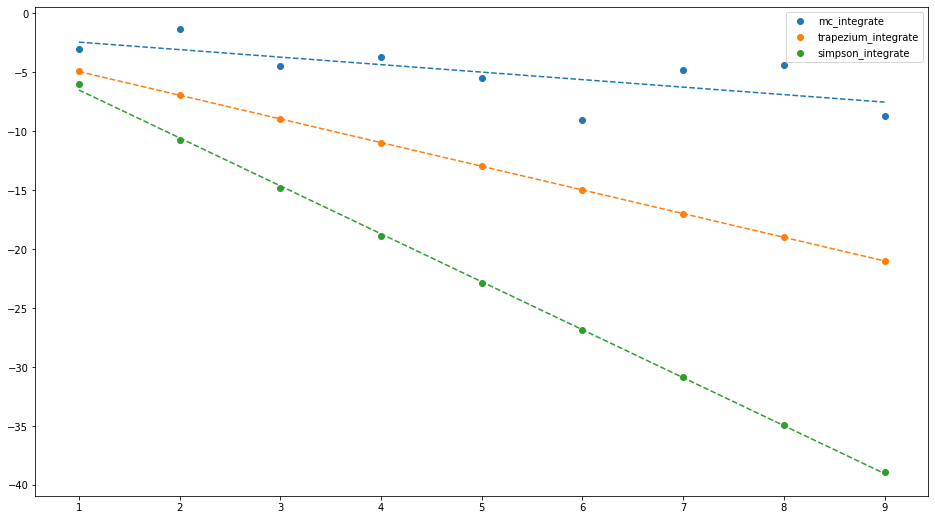

In [11]:
plt.figure(figsize = (16,9))
for key, value in errors.items():
    x = np.log2(samples)
    y = np.log2(value)
    plt.scatter(x,y, label=key)
    
    coef = np.polyfit(x, y, 1)
    print('Gradient of {}: {}'.format(key, coef[0]))
    poly1d_fn = np.poly1d(coef)
    plt.plot(x, poly1d_fn(x), '--')


plt.legend()
plt.show()